In [3]:
pip install dash pandas numpy seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gdown

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import seaborn as sns
import plotly.graph_objs as go

import dash
from dash import html, dcc, Input, Output
import base64
import io

In [5]:
!pip install gdown pandas

In [9]:
file_id = '1oRB3DMP1NtnnwfQcaYHo9a3bUcbQfB5U'
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
gdown.download(download_url, 'CasosCancer.xlsx', quiet=False)

file_id = '1xHYonZp8RbPYCE9kihc3IthwOtgVNi1P'
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
gdown.download(download_url, 'CasosDiabetes.xlsx', quiet=False)

file_id = '1_jue36lk4iJim6btVh_tSUkR0i_QGeIk'
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
gdown.download(download_url, 'CasosHipertensionArterial.xlsx', quiet=False)

file_id = '19aVPGne2nPm7_I0L9i_csyEBRw9geGea'
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
gdown.download(download_url, 'CasosObesidad.xlsx', quiet=False)

file_id = '1tK7dDEo1b7gWn-KHl1qE_WL62ztrygHw'
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
gdown.download(download_url, 'CasosNeumonia.xlsx', quiet=False)

file_id = '1kAXyvg1cvLtl7w8a6D1AijMwFLJiialT'
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
gdown.download(download_url, 'CasosChagas.xlsx', quiet=False)

file_id = '1xmnFEOBzaIZa3Ah4daAVEMo4HeLCVyZK'
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
gdown.download(download_url, 'CasosVIH.xlsx', quiet=False)

file_id = '1G8k9bqzJop0dSgFjigeVrzVQiuHuUFUp'
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
gdown.download(download_url, 'CasosEstadoNutricional.xlsx', quiet=False)

file_id = '1WGjRPOdiKjbblojvO96WpkfSITvbpvsH'
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
gdown.download(download_url, 'CasosEmbarazoAdolescente.xlsx', quiet=False)

file_id = '1iA8HOY1nCGd62dqL1RU3MMgitXKT1a4q'
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
gdown.download(download_url, 'CasosConsultaExterna.xlsx', quiet=False)


Downloading...
From: https://drive.google.com/uc?export=download&id=1oRB3DMP1NtnnwfQcaYHo9a3bUcbQfB5U
To: C:\Users\noemi\Documents\TrabajoOPS\CasosCancer.xlsx
100%|██████████| 26.1k/26.1k [00:00<00:00, 668kB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1xHYonZp8RbPYCE9kihc3IthwOtgVNi1P
To: C:\Users\noemi\Documents\TrabajoOPS\CasosDiabetes.xlsx
100%|██████████| 26.4k/26.4k [00:00<00:00, 677kB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1_jue36lk4iJim6btVh_tSUkR0i_QGeIk
To: C:\Users\noemi\Documents\TrabajoOPS\CasosHipertensionArterial.xlsx
100%|██████████| 26.7k/26.7k [00:00<00:00, 720kB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=19aVPGne2nPm7_I0L9i_csyEBRw9geGea
To: C:\Users\noemi\Documents\TrabajoOPS\CasosObesidad.xlsx
100%|██████████| 26.2k/26.2k [00:00<00:00, 671kB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1tK7dDEo1b7gWn-KHl1qE_WL62ztrygHw
To: C:\Users\noemi\Documents\Trabajo

'CasosConsultaExterna.xlsx'

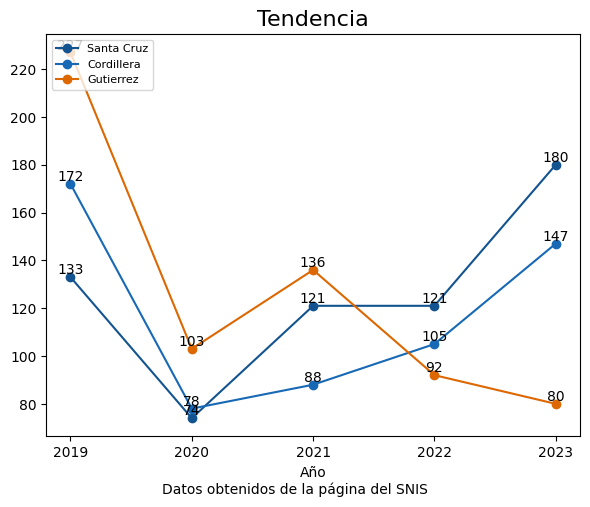

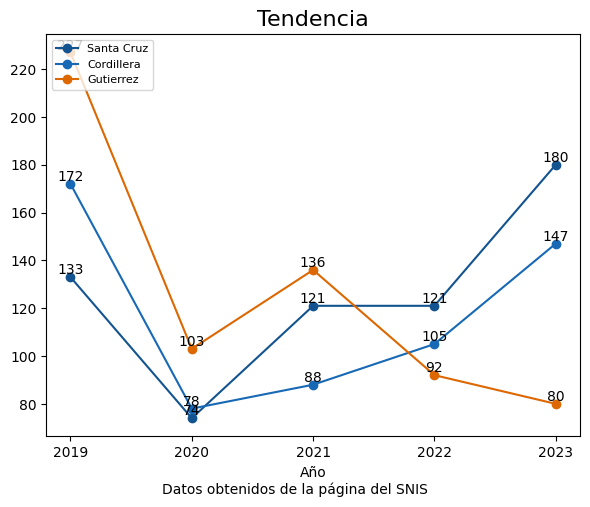

In [61]:
# Inicializa la aplicación Dash
app = dash.Dash(__name__, suppress_callback_exceptions=True)
# Función para calcular incidencias
def calculate_gender(df, factor, m, h):
    # Población estimada
    total_mujeres = {2019: m[0], 2020: m[1], 2021: m[2], 2022: m[3], 2023: m[4]}
    total_hombres = {2019: h[0], 2020: h[1], 2021: h[2], 2022: h[3], 2023: h[4]}

    # Calcular incidencias
    df['Incidencia'] = df.apply(
        lambda row: (row['Total'] / total_hombres[row['Año']] * factor) if row['Sexo'] == 'Hombre' else (row['Total'] / total_mujeres[row['Año']] * factor),
        axis=1
    ).round().astype(int)
    
    # Calcular los totales para hombres y mujeres
    total_hombres = df[df['Sexo'] == 'Hombre']['Total'].sum()
    total_mujeres = df[df['Sexo'] == 'Mujer']['Total'].sum()

    # Asegurarse de que los totales no sean cero
    total_hombres = total_hombres if total_hombres != 0 else 1
    total_mujeres = total_mujeres if total_mujeres != 0 else 1

    # Calcular el porcentaje y redondear a 2 decimales
    df['Porcentaje'] = df.apply(
        lambda row: (row['Total'] / total_hombres * 100) if row['Sexo'] == 'Hombre' else (row['Total'] / total_mujeres * 100),
        axis=1
    ).round(2)

    return df

def generate_total(df):
    df = df.groupby('Año').sum()
    df_total = df.drop(columns=['Sexo']).reset_index()
    return df_total

def calculate_total(df, factor, p):
    poblacion_estimada = {
        2019: p[0],
        2020: p[1],
        2021: p[2],
        2022: p[3],
        2023: p[4]
    }
    df['Incidencia'] = (((df['Total']/df['Año'].map(poblacion_estimada)) * factor).round(0)).astype(int)
    suma_total = df['Total'].sum()
    suma_total = suma_total if suma_total != 0 else 1
    df['Porcentaje'] = (((df['Total']/suma_total)) * 100).round(2)
    
    return df

def generate_lines_total(df1, df2, df3, x_column, y_column, title, size_title, footer, size_footer, size_legend, size_graph, labels, legend_loc):
    colors = ['#DD6700', '#EA7E1F', '#FFB26F', '#FFCBA6', '#FFE5D1', '#135490', '#1769B5', '#2688E3', '#8FCFFF', '#CDE7FF']
    
    plt.figure(figsize=(6, 5))
    
    años = sorted(df1[x_column].unique())

    line1, = plt.plot(df1[x_column], df1[y_column], color=colors[5], marker='o', linestyle='-', label=labels[0])
    line2, = plt.plot(df2[x_column], df2[y_column], color=colors[6], marker='o', linestyle='-', label=labels[1])
    line3, = plt.plot(df3[x_column], df3[y_column], color=colors[0], marker='o', linestyle='-', label=labels[2])

    if y_column == 'Incidencia':
        # Agrega los números sobre cada punto de la línea de tendencia 1
        for x, y in zip(df1[x_column], df1[y_column]):
            plt.text(x, y, f"{y:.0f}", ha='center', va='bottom', fontsize=size_graph, color='black')
        # Agrega los números sobre cada punto de la línea de tendencia 2
        for x, y in zip(df2[x_column], df2[y_column]):
            plt.text(x, y, f"{y:.0f}", ha='center', va='bottom', fontsize=size_graph, color='black')
        # Agrega los números sobre cada punto de la línea de tendencia 3
        for x, y in zip(df3[x_column], df3[y_column]):
            plt.text(x, y, f"{y:.0f}", ha='center', va='bottom', fontsize=size_graph, color='black')
    else:
        for x, y in zip(df1[x_column], df1[y_column]):
            plt.text(x, y, f"{y:.2f}%", ha='center', va='bottom', fontsize=size_graph, color='black')
        # Agrega los números sobre cada punto de la línea de tendencia 2
        for x, y in zip(df2[x_column], df2[y_column]):
            plt.text(x, y, f"{y:.2f}%", ha='center', va='bottom', fontsize=size_graph, color='black')
        # Agrega los números sobre cada punto de la línea de tendencia 3
        for x, y in zip(df3[x_column], df3[y_column]):
            plt.text(x, y, f"{y:.2f}%", ha='center', va='bottom', fontsize=size_graph, color='black')

    # Configura los ejes y el título
    plt.xlabel(x_column)
    #plt.ylabel(y_column)
    plt.title(title, fontsize=size_title)
    plt.xticks(años)
    plt.legend(loc=legend_loc, fontsize=size_legend)
    #plt.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 1])
    # Agregar referencia en la parte inferior del gráfico
    plt.figtext(0.5, 0.01, footer, ha='center', va='center', fontsize=size_footer, color='black')
    # Ocultar el eje y
    #plt.yticks([])
    
    # Convertir la gráfica a base64
    tmp_file = io.BytesIO()
    plt.savefig(tmp_file, format='png')
    tmp_file.seek(0)
    plot_base64 = base64.b64encode(tmp_file.getvalue()).decode('utf-8')

    # Mostrar la gráfica en un componente HTML
    return html.Div([
        html.H2(title),
        html.Img(src='data:image/png;base64,{}'.format(plot_base64), style={'width': '100%'})
    ])
    

# Función para generar la gráfica y mostrarla en base64
def generate_lines_gender(df1, df2, df3, x_column, y_column, title, size_title, footer, size_footer, size_legend, size_graph, labels, legend_loc):
    años = sorted(df1[x_column].unique())

    fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
    
    colors = ['#DD6700', '#EA7E1F', '#FFB26F', '#FFCBA6', '#FFE5D1', '#135490', '#1769B5', '#2688E3', '#8FCFFF', '#CDE7FF']

    # Gráfica para hombres
    ax[0].plot(df1[df1['Sexo'] == 'Hombre'][x_column], df1[df1['Sexo'] == 'Hombre'][y_column], color=colors[5], marker='o', linestyle='-', label=labels[0])
    ax[0].plot(df2[df2['Sexo'] == 'Hombre'][x_column], df2[df2['Sexo'] == 'Hombre'][y_column], color=colors[6], marker='o', linestyle='-', label=labels[1])
    ax[0].plot(df3[df3['Sexo'] == 'Hombre'][x_column], df3[df3['Sexo'] == 'Hombre'][y_column], color=colors[7], marker='o', linestyle='-', label=labels[2])
    ax[0].set_xlabel(x_column)
    ax[0].set_title(f'Tendencia - Hombres')
    ax[0].legend(loc=legend_loc, fontsize=size_legend)
    ax[0].set_xticks(años)

    if y_column == 'Incidencia':
        for df_h in [df1[df1['Sexo'] == 'Hombre'], df2[df2['Sexo'] == 'Hombre'], df3[df3['Sexo'] == 'Hombre']]:
            for x, y in zip(df_h[x_column], df_h[y_column]):
                ax[0].text(x, y, f"{y:.0f}", ha='center', va='bottom', fontsize=size_graph, color='black')
    else:
        for df_h in [df1[df1['Sexo'] == 'Hombre'], df2[df2['Sexo'] == 'Hombre'], df3[df3['Sexo'] == 'Hombre']]:
            for x, y in zip(df_h[x_column], df_h[y_column]):
                ax[0].text(x, y, f"{y:.2f}%", ha='center', va='bottom', fontsize=size_graph, color='black')

    # Gráfica para mujeres
    ax[1].plot(df1[df1['Sexo'] == 'Mujer'][x_column], df1[df1['Sexo'] == 'Mujer'][y_column], color=colors[0], marker='o', linestyle='-', label=labels[0])
    ax[1].plot(df2[df2['Sexo'] == 'Mujer'][x_column], df2[df2['Sexo'] == 'Mujer'][y_column], color=colors[1], marker='o', linestyle='-', label=labels[1])
    ax[1].plot(df3[df3['Sexo'] == 'Mujer'][x_column], df3[df3['Sexo'] == 'Mujer'][y_column], color=colors[2], marker='o', linestyle='-', label=labels[2])
    ax[1].set_xlabel(x_column)
    ax[1].set_title(f'Tendencia - Mujeres')
    ax[1].legend(loc=legend_loc, fontsize=size_legend)
    ax[1].set_xticks(años)

    if y_column == 'Incidencia':
        for df_m in [df1[df1['Sexo'] == 'Mujer'], df2[df2['Sexo'] == 'Mujer'], df3[df3['Sexo'] == 'Mujer']]:
            for x, y in zip(df_m[x_column], df_m[y_column]):
                ax[1].text(x, y, f"{y:.0f}", ha='center', va='bottom', fontsize=size_graph, color='black')
    else:
        for df_m in [df1[df1['Sexo'] == 'Mujer'], df2[df2['Sexo'] == 'Mujer'], df3[df3['Sexo'] == 'Mujer']]:
            for x, y in zip(df_m[x_column], df_m[y_column]):
                ax[1].text(x, y, f"{y:.2f}%", ha='center', va='bottom', fontsize=size_graph, color='black')
                

    # Agregar título principal
    fig.suptitle(title, fontsize=size_title)
    # Ajustar el layout para dar espacio al título principal
    plt.tight_layout(rect=[0, 0, 1, 1])
    # Agregar referencia en la parte inferior del gráfico
    fig.text(0.5, 0.01, footer, ha='center', va='center', fontsize=size_footer, color='black')
    

    # Convertir la gráfica a base64
    tmp_file = io.BytesIO()
    plt.savefig(tmp_file, format='png')
    tmp_file.seek(0)
    plot_base64 = base64.b64encode(tmp_file.getvalue()).decode('utf-8')

    # Mostrar la gráfica en un componente HTML
    return html.Div([
        html.H2(title),
        html.Img(src='data:image/png;base64,{}'.format(plot_base64), style={'width': '100%'})
    ])

def generate_lines_separate_gender(df1, df2, df3, x_column, y_column, title, size_title, footer, size_footer, size_legend, size_graph, labels, legend_loc):
    años = sorted(df1[x_column].unique())
    
    colors = ['#DD6700', '#EA7E1F', '#FFB26F', '#FFCBA6', '#FFE5D1', '#135490', '#1769B5', '#2688E3', '#8FCFFF', '#CDE7FF']

    fig, ax = plt.subplots(2, 3, figsize=(14, 8), sharey=True)

    # Gráfica para hombres - Departamento
    ax[0, 0].plot(df3[df3['Sexo'] == 'Hombre'][x_column], df3[df3['Sexo'] == 'Hombre'][y_column], color=colors[5], marker='o', linestyle='-', label=labels[0])
    ax[0, 0].set_xlabel(x_column)
    ax[0, 0].set_title(f'Tendencia Municipal - {labels[0]}')
    ax[0, 0].legend(loc=legend_loc, fontsize=size_legend)
    ax[0, 0].set_xticks(años)

    # Gráfica para hombres - Provincia
    ax[0, 1].plot(df2[df2['Sexo'] == 'Hombre'][x_column], df2[df2['Sexo'] == 'Hombre'][y_column], color=colors[6], marker='o', linestyle='-', label=labels[1])
    ax[0, 1].set_xlabel(x_column)
    ax[0, 1].set_title(f'Tendencia Provincial - {labels[1]}')
    ax[0, 1].legend(loc=legend_loc, fontsize=size_legend)
    ax[0, 1].set_xticks(años)

    # Gráfica para hombres - Municipio
    ax[0, 2].plot(df1[df1['Sexo'] == 'Hombre'][x_column], df1[df1['Sexo'] == 'Hombre'][y_column], color=colors[7], marker='o', linestyle='-', label=labels[2])
    ax[0, 2].set_xlabel(x_column)
    ax[0, 2].set_title(f'Tendencia Departamental - {labels[2]}')
    ax[0, 2].legend(loc=legend_loc, fontsize=size_legend)
    ax[0, 2].set_xticks(años)

    if y_column == 'Incidencia':
        for x, y in zip(df3[df3['Sexo'] == 'Hombre'][x_column], df3[df3['Sexo'] == 'Hombre'][y_column]):
            ax[0, 0].text(x, y, f"{y:.0f}", ha='center', va='bottom', fontsize=size_graph, color='black')
            
        for x, y in zip(df2[df2['Sexo'] == 'Hombre'][x_column], df2[df2['Sexo'] == 'Hombre'][y_column]):
            ax[0, 1].text(x, y, f"{y:.0f}", ha='center', va='bottom', fontsize=size_graph, color='black')
        
        for x, y in zip(df1[df1['Sexo'] == 'Hombre'][x_column], df1[df1['Sexo'] == 'Hombre'][y_column]):
            ax[0, 2].text(x, y, f"{y:.0f}", ha='center', va='bottom', fontsize=size_graph, color='black')
    else:
        for x, y in zip(df3[df3['Sexo'] == 'Hombre'][x_column], df3[df3['Sexo'] == 'Hombre'][y_column]):
            ax[0, 0].text(x, y, f"{y:.2f}%", ha='center', va='bottom', fontsize=size_graph, color='black')
        
        for x, y in zip(df2[df2['Sexo'] == 'Hombre'][x_column], df2[df2['Sexo'] == 'Hombre'][y_column]):
            ax[0, 1].text(x, y, f"{y:.2f}%", ha='center', va='bottom', fontsize=size_graph, color='black')
            
        for x, y in zip(df1[df1['Sexo'] == 'Hombre'][x_column], df1[df1['Sexo'] == 'Hombre'][y_column]):
            ax[0, 2].text(x, y, f"{y:.2f}%", ha='center', va='bottom', fontsize=size_graph, color='black')

    # Gráfica para mujeres - Departamento
    ax[1, 0].plot(df3[df3['Sexo'] == 'Mujer'][x_column], df3[df3['Sexo'] == 'Mujer'][y_column], color=colors[0], marker='o', linestyle='-', label=labels[0])
    ax[1, 0].set_xlabel(x_column)
    ax[1, 0].set_title(f'Tendencia Municipal - {labels[0]}')
    ax[1, 0].legend(loc=legend_loc, fontsize=size_legend)
    ax[1, 0].set_xticks(años)

    # Gráfica para mujeres - Provincia
    ax[1, 1].plot(df2[df2['Sexo'] == 'Mujer'][x_column], df2[df2['Sexo'] == 'Mujer'][y_column], color=colors[1], marker='o', linestyle='-', label=labels[1])
    ax[1, 1].set_xlabel(x_column)
    ax[1, 1].set_title(f'Tendencia Provincial - {labels[1]}')
    ax[1, 1].legend(loc=legend_loc, fontsize=size_legend)
    ax[1, 1].set_xticks(años)

    # Gráfica para mujeres - Municipio
    ax[1, 2].plot(df1[df1['Sexo'] == 'Mujer'][x_column], df1[df1['Sexo'] == 'Mujer'][y_column], color=colors[2], marker='o', linestyle='-', label=labels[2])
    ax[1, 2].set_xlabel(x_column)
    ax[1, 2].set_title(f'Tendencia Departamental - {labels[2]}')
    ax[1, 2].legend(loc=legend_loc, fontsize=size_legend)
    ax[1, 2].set_xticks(años)
    
    if y_column == 'Incidencia':
        for x, y in zip(df1[df1['Sexo'] == 'Mujer'][x_column], df1[df1['Sexo'] == 'Mujer'][y_column]):
            ax[1, 0].text(x, y, f"{y:.0f}", ha='center', va='bottom', fontsize=size_graph, color='black')
            
        for x, y in zip(df2[df2['Sexo'] == 'Mujer'][x_column], df2[df2['Sexo'] == 'Mujer'][y_column]):
            ax[1, 1].text(x, y, f"{y:.0f}", ha='center', va='bottom', fontsize=size_graph, color='black')
        
        for x, y in zip(df3[df3['Sexo'] == 'Mujer'][x_column], df3[df3['Sexo'] == 'Mujer'][y_column]):
            ax[1, 2].text(x, y, f"{y:.0f}", ha='center', va='bottom', fontsize=size_graph, color='black')
    else:
        for x, y in zip(df1[df1['Sexo'] == 'Mujer'][x_column], df1[df1['Sexo'] == 'Mujer'][y_column]):
            ax[1, 0].text(x, y, f"{y:.2f}%", ha='center', va='bottom', fontsize=size_graph, color='black')
        
        for x, y in zip(df2[df2['Sexo'] == 'Mujer'][x_column], df2[df2['Sexo'] == 'Mujer'][y_column]):
            ax[1, 1].text(x, y, f"{y:.2f}%", ha='center', va='bottom', fontsize=size_graph, color='black')
            
        for x, y in zip(df3[df3['Sexo'] == 'Mujer'][x_column], df3[df3['Sexo'] == 'Mujer'][y_column]):
            ax[1, 2].text(x, y, f"{y:.2f}%", ha='center', va='bottom', fontsize=size_graph, color='black')


    # Agregar etiquetas para los ejes y
    fig.text(0.01, 0.75, y_column + ' Hombres', ha='center', va='center', rotation='vertical', fontsize=12, color='black')
    fig.text(0.01, 0.25, y_column + ' Mujeres', ha='center', va='center', rotation='vertical', fontsize=12, color='black')

    # Ocultar el eje y de todas las subgráficas
    #for axs in ax:
    #    for a in axs:
    #        a.set_yticks([])

    fig.suptitle(title, fontsize=size_title)
    plt.tight_layout(rect=[0, 0, 1, 1])
    # Agregar referencia en la parte inferior del gráfico
    fig.text(0.5, 0.01, footer, ha='center', va='center', fontsize=size_footer, color='black')
    

    # Convertir la gráfica a base64
    tmp_file = io.BytesIO()
    plt.savefig(tmp_file, format='png')
    tmp_file.seek(0)
    plot_base64 = base64.b64encode(tmp_file.getvalue()).decode('utf-8')

    # Mostrar la gráfica en un componente HTML
    return html.Div([
        html.H2(title),
        html.Img(src='data:image/png;base64,{}'.format(plot_base64), style={'width': '100%'})
    ])

def generate_lines_comparison_gender(df1, df2, df3, x_column, y_column, title, size_title, footer, size_footer, size_legend, size_graph, labels, legend_loc):
    años = sorted(df1[x_column].unique())
    colors = ['#DD6700', '#EA7E1F', '#FFB26F', '#FFCBA6', '#FFE5D1', '#135490', '#1769B5', '#2688E3', '#8FCFFF', '#CDE7FF']

    fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

    # Gráfica para Municipio
    ax[0].plot(df1[df1['Sexo'] == 'Hombre'][x_column], df1[df1['Sexo'] == 'Hombre'][y_column], color=colors[5], marker='o', linestyle='-', label=f'Hombres - {labels[0]}')
    ax[0].plot(df1[df1['Sexo'] == 'Mujer'][x_column], df1[df1['Sexo'] == 'Mujer'][y_column], color=colors[0], marker='o', linestyle='-', label=f'Mujeres - {labels[0]}')
    ax[0].set_xlabel(x_column)
    ax[0].set_title(f'Tendencia Municipal - {labels[0]}')
    ax[0].legend(loc=legend_loc, fontsize=size_legend)
    ax[0].set_xticks(años)
        
    # Gráfica para Provincia
    ax[1].plot(df2[df2['Sexo'] == 'Hombre'][x_column], df2[df2['Sexo'] == 'Hombre'][y_column], color=colors[6], marker='o', linestyle='-', label=f'Hombres - {labels[1]}')
    ax[1].plot(df2[df2['Sexo'] == 'Mujer'][x_column], df2[df2['Sexo'] == 'Mujer'][y_column], color=colors[1], marker='o', linestyle='-', label=f'Mujeres - {labels[1]}')
    ax[1].set_xlabel(x_column)
    ax[1].set_title(f'Tendencia Provincial - {labels[1]}')
    ax[1].legend(loc=legend_loc, fontsize=size_legend)
    ax[1].set_xticks(años)
    
    # Gráfica para Departamento
    ax[2].plot(df3[df3['Sexo'] == 'Hombre'][x_column], df3[df3['Sexo'] == 'Hombre'][y_column], color=colors[7], marker='o', linestyle='-', label=f'Hombres - {labels[2]}')
    ax[2].plot(df3[df3['Sexo'] == 'Mujer'][x_column], df3[df3['Sexo'] == 'Mujer'][y_column], color=colors[2], marker='o', linestyle='-', label=f'Mujeres - {labels[2]}')
    ax[2].set_xlabel(x_column)
    ax[2].set_title(f'Tendencia Departamental - {labels[2]}')
    ax[2].legend(loc=legend_loc, fontsize=size_legend)
    ax[2].set_xticks(años)

    if y_column == 'Incidencia':
        for x, y in zip(df1[df1['Sexo'] == 'Hombre'][x_column], df1[df1['Sexo'] == 'Hombre'][y_column]):
            ax[0].text(x, y, f"{y:.0f}", ha='center', va='bottom', fontsize=size_graph, color='black')
        for x, y in zip(df1[df1['Sexo'] == 'Mujer'][x_column], df1[df1['Sexo'] == 'Mujer'][y_column]):
            ax[0].text(x, y, f"{y:.0f}", ha='center', va='bottom', fontsize=size_graph, color='black')
            
        for x, y in zip(df2[df2['Sexo'] == 'Hombre'][x_column], df2[df2['Sexo'] == 'Hombre'][y_column]):
            ax[1].text(x, y, f"{y:.0f}", ha='center', va='bottom', fontsize=size_graph, color='black')
        for x, y in zip(df2[df2['Sexo'] == 'Mujer'][x_column], df2[df2['Sexo'] == 'Mujer'][y_column]):
            ax[1].text(x, y, f"{y:.0f}", ha='center', va='bottom', fontsize=size_graph, color='black')
        
        for x, y in zip(df3[df3['Sexo'] == 'Hombre'][x_column], df3[df3['Sexo'] == 'Hombre'][y_column]):
            ax[2].text(x, y, f"{y:.0f}", ha='center', va='bottom', fontsize=size_graph, color='black')
        for x, y in zip(df3[df3['Sexo'] == 'Mujer'][x_column], df3[df3['Sexo'] == 'Mujer'][y_column]):
            ax[2].text(x, y, f"{y:.0f}", ha='center', va='bottom', fontsize=size_graph, color='black')
    else:
        for x, y in zip(df1[df1['Sexo'] == 'Hombre'][x_column], df1[df1['Sexo'] == 'Hombre'][y_column]):
            ax[0].text(x, y, f"{y:.2f}%", ha='center', va='bottom', fontsize=size_graph, color='black')
        for x, y in zip(df1[df1['Sexo'] == 'Mujer'][x_column], df1[df1['Sexo'] == 'Mujer'][y_column]):
            ax[0].text(x, y, f"{y:.2f}%", ha='center', va='bottom', fontsize=size_graph, color='black')
            
        for x, y in zip(df2[df2['Sexo'] == 'Hombre'][x_column], df2[df2['Sexo'] == 'Hombre'][y_column]):
            ax[1].text(x, y, f"{y:.2f}%", ha='center', va='bottom', fontsize=size_graph, color='black')
        for x, y in zip(df2[df2['Sexo'] == 'Mujer'][x_column], df2[df2['Sexo'] == 'Mujer'][y_column]):
            ax[1].text(x, y, f"{y:.2f}%", ha='center', va='bottom', fontsize=size_graph, color='black')
            
        for x, y in zip(df3[df3['Sexo'] == 'Hombre'][x_column], df3[df3['Sexo'] == 'Hombre'][y_column]):
            ax[2].text(x, y, f"{y:.2f}%", ha='center', va='bottom', fontsize=size_graph, color='black')
        for x, y in zip(df3[df3['Sexo'] == 'Mujer'][x_column], df3[df3['Sexo'] == 'Mujer'][y_column]):
            ax[2].text(x, y, f"{y:.2f}%", ha='center', va='bottom', fontsize=size_graph, color='black')

    
    fig.suptitle(title, fontsize=size_title)
    plt.tight_layout(rect=[0, 0, 1, 1])
    # Agregar referencia en la parte inferior del gráfico
    fig.text(0.5, 0.01, footer, ha='center', va='center', fontsize=size_footer, color='black')
    

    # Convertir la gráfica a base64
    tmp_file = io.BytesIO()
    plt.savefig(tmp_file, format='png')
    tmp_file.seek(0)
    plot_base64 = base64.b64encode(tmp_file.getvalue()).decode('utf-8')

    # Mostrar la gráfica en un componente HTML
    return html.Div([
        html.H2(title),
        html.Img(src='data:image/png;base64,{}'.format(plot_base64), style={'width': '100%'})
    ])


def plot_age_percentages(df, m, h, x_column, y_column, title, size_title, footer, size_footer, size_legend, size_graph, legend_loc):
    # Calcular porcentajes
    df_percent = df.copy()
    colors = ['#DD6700', '#EA7E1F', '#FFB26F', '#FFCBA6', '#FFE5D1', '#135490', '#1769B5', '#2688E3', '#8FCFFF', '#CDE7FF']

    df_percent['0-9'] = df_percent['< 6'] + df_percent['0-1'] + df_percent['1-4'] + df_percent['5-9']
    df_percent['10-19'] = df_percent['10-14'] + df_percent['15-19']
    
    
    # Calcular los totales para hombres y mujeres
    total_hombres = df[df['Sexo'] == 'Hombre']['Total'].sum()
    total_mujeres = df[df['Sexo'] == 'Mujer']['Total'].sum()
    
    # Asegurarse de que los totales no sean cero
    total_hombres = total_hombres if total_hombres != 0 else 1
    total_mujeres = total_mujeres if total_mujeres != 0 else 1
    
    # Calcular porcentajes
    if y_column == "Porcentaje":
        df_percent['0-9 %'] = df_percent.apply(
            lambda row: (row['0-9'] / total_hombres * 100) if row['Sexo'] == 'Hombre' else (row['0-9'] / total_mujeres * 100),
            axis=1
        ).round(2)
        df_percent['10-19 %'] = df_percent.apply(
            lambda row: (row['10-19'] / total_hombres * 100) if row['Sexo'] == 'Hombre' else (row['10-19'] / total_mujeres * 100),
            axis=1
        ).round(2)
        df_percent['20-39 %'] = df_percent.apply(
            lambda row: (row['20-39'] / total_hombres * 100) if row['Sexo'] == 'Hombre' else (row['20-39'] / total_mujeres * 100),
            axis=1
        ).round(2)
        df_percent['40-49 %'] = df_percent.apply(
            lambda row: (row['40-49'] / total_hombres * 100) if row['Sexo'] == 'Hombre' else (row['40-49'] / total_mujeres * 100),
            axis=1
        ).round(2)
        df_percent['50-59 %'] = df_percent.apply(
            lambda row: (row['50-59'] / total_hombres * 100) if row['Sexo'] == 'Hombre' else (row['50-59'] / total_mujeres * 100),
            axis=1
        ).round(2)
        df_percent['60+ %'] = df_percent.apply(
            lambda row: (row['60+'] / total_hombres * 100) if row['Sexo'] == 'Hombre' else (row['60+'] / total_mujeres * 100),
            axis=1
        ).round(2)
    else:
        total_mujeres_0_9 = {2019: m[0], 2020: m[1], 2021: m[2], 2022: m[3], 2023: m[4]}
        total_mujeres_10_19 = {2019: m[5], 2020: m[6], 2021: m[7], 2022: m[8], 2023: m[9]}
        total_mujeres_20_39 = {2019: m[10], 2020: m[11], 2021: m[12], 2022: m[13], 2023: m[14]}
        total_mujeres_40_49 = {2019: m[15], 2020: m[16], 2021: m[17], 2022: m[18], 2023: m[19]}
        total_mujeres_50_59 = {2019: m[20], 2020: m[21], 2021: m[22], 2022: m[23], 2023: m[24]}
        total_mujeres_60 = {2019: m[25], 2020: m[26], 2021: m[27], 2022: m[28], 2023: m[29]}

        total_hombres_0_9 = {2019: h[0], 2020: h[1], 2021: h[2], 2022: h[3], 2023: h[4]}
        total_hombres_10_19 = {2019: h[5], 2020: h[6], 2021: h[7], 2022: h[8], 2023: h[9]}
        total_hombres_20_39 = {2019: h[10], 2020: h[11], 2021: h[12], 2022: h[13], 2023: h[14]}
        total_hombres_40_49 = {2019: h[15], 2020: h[16], 2021: h[17], 2022: h[18], 2023: h[19]}
        total_hombres_50_59 = {2019: h[20], 2020: h[21], 2021: h[22], 2022: h[23], 2023: h[24]}
        total_hombres_60 = {2019: h[25], 2020: h[26], 2021: h[27], 2022: h[28], 2023: h[29]}

        df_percent['0-9 %'] = df_percent.apply(
            lambda row: (row['0-9'] / total_hombres_0_9[row['Año']] * 10000) if row['Sexo'] == 'Hombre' else (row['0-9'] / total_mujeres_0_9[row['Año']] * 10000),
            axis=1
        ).round(2)
        df_percent['10-19 %'] = df_percent.apply(
            lambda row: (row['10-19'] / total_hombres_10_19[row['Año']] * 10000) if row['Sexo'] == 'Hombre' else (row['10-19'] / total_mujeres_10_19[row['Año']] * 10000),
            axis=1
        ).round(2)
        df_percent['20-39 %'] = df_percent.apply(
            lambda row: (row['20-39'] / total_hombres_20_39[row['Año']] * 10000) if row['Sexo'] == 'Hombre' else (row['20-39'] / total_mujeres_20_39[row['Año']] * 10000),
            axis=1
        ).round(2)
        df_percent['40-49 %'] = df_percent.apply(
            lambda row: (row['40-49'] / total_hombres_40_49[row['Año']] * 10000) if row['Sexo'] == 'Hombre' else (row['40-49'] / total_mujeres_40_49[row['Año']] * 10000),
            axis=1
        ).round(2)
        df_percent['50-59 %'] = df_percent.apply(
            lambda row: (row['50-59'] / total_hombres_50_59[row['Año']] * 10000) if row['Sexo'] == 'Hombre' else (row['50-59'] / total_mujeres_50_59[row['Año']] * 10000),
            axis=1
        ).round(2)
        df_percent['60+ %'] = df_percent.apply(
            lambda row: (row['60+'] / total_hombres_60[row['Año']] * 10000) if row['Sexo'] == 'Hombre' else (row['60+'] / total_mujeres_60[row['Año']] * 10000),
            axis=1
        ).round()
    
    
    # Filtrar las columnas que contienen '%'
    columns_pct = ['0-9 %', '10-19 %', '20-39 %', '40-49 %', '50-59 %', '60+ %']

    #  Filtrar los datos por sexo
    df_hombres = df_percent[df_percent['Sexo'] == 'Hombre']
    df_mujeres = df_percent[df_percent['Sexo'] == 'Mujer']

    # Configuración de la figura
    fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

    bar_width = 0.25  # Ancho de las barras
    years = df[x_column].unique()

    # Crear gráfico de barras para Hombres
    for i, year in enumerate(years):
        data = df_hombres[df_hombres[x_column] == year][columns_pct].iloc[0]
        positions = np.arange(len(columns_pct)) + i * bar_width
        bars = ax[0].bar(positions, data, color=colors[i+5], width=bar_width, label=str(year), alpha=1)
        if y_column == 'Porcentaje':
            for bar in bars:
                yval = bar.get_height()
                ax[0].text(bar.get_x() + bar.get_width()/2, yval + 0.05, f'{yval:.2f}', ha='center', va='bottom', fontsize=size_graph)
        else:
            for bar in bars:
                yval = bar.get_height()
                ax[0].text(bar.get_x() + bar.get_width()/2, yval + 0.05, f'{yval:.0f}', ha='center', va='bottom', fontsize=size_graph)

    ax[0].set_title(y_column+' por Edad - Hombres')
    ax[0].legend(loc=legend_loc, fontsize=size_legend)
    ax[0].set_ylim(0, max(df_hombres[columns_pct].values.max(), df_mujeres[columns_pct].values.max()) * 1.1)
    ax[0].set_xlabel('Edad')

    # Crear gráfico de barras para Mujeres
    for i, year in enumerate(years):
        data = df_mujeres[df_mujeres[x_column] == year][columns_pct].iloc[0]
        positions = np.arange(len(columns_pct)) + i * bar_width
        bars = ax[1].bar(positions, data, color=colors[i], width=bar_width, label=str(year), alpha=1)
        if y_column == 'Porcentaje':
            for bar in bars:
                yval = bar.get_height()
                ax[1].text(bar.get_x() + bar.get_width()/2, yval + 0.05, f'{yval:.2f}', ha='center', va='bottom', fontsize=size_graph)
        else:
            for bar in bars:
                yval = bar.get_height()
                ax[1].text(bar.get_x() + bar.get_width()/2, yval + 0.05, f'{yval:.0f}', ha='center', va='bottom', fontsize=size_graph)

    ax[1].set_title(y_column+' por Edad - Mujeres')
    ax[1].legend(loc=legend_loc, fontsize=size_legend)
    ax[1].set_ylim(0, max(df_hombres[columns_pct].values.max(), df_mujeres[columns_pct].values.max()) * 1.1)
    ax[1].set_xlabel('Edad')

    # Ajustar etiquetas del eje x
    ax[1].set_xticks(np.arange(len(columns_pct)) + bar_width * (len(years) - 1) / 2)
    ax[1].set_xticklabels(['0-9', '10-19', '20-39', '40-49', '50-59', '60+'], rotation=0, fontsize=10)

    # Quitar el nombre del eje y
    ax[0].set_ylabel('')
    ax[1].set_ylabel('')

    fig.suptitle(title, fontsize=size_title)
    plt.tight_layout(rect=[0, 0, 1, 1])
    # Agregar referencia en la parte inferior del gráfico
    fig.text(0.5, 0.01, footer, ha='center', va='center', fontsize=size_footer, color='black')
    

    # Convertir la gráfica a base64
    tmp_file = io.BytesIO()
    plt.savefig(tmp_file, format='png')
    tmp_file.seek(0)
    plot_base64 = base64.b64encode(tmp_file.getvalue()).decode('utf-8')

    # Mostrar la gráfica en un componente HTML
    return html.Div([
        html.H2(title),
        html.Img(src='data:image/png;base64,{}'.format(plot_base64), style={'width': '100%'})
    ])

# Define las funciones para descargar y leer los datos
def get_casos_cancer():
    df_c_cancer = pd.read_excel('CasosCancer.xlsx', sheet_name="CANCER-C")
    df_g_cancer = pd.read_excel('CasosCancer.xlsx', sheet_name="CANCER-G")
    df_pc_cancer = pd.read_excel('CasosCancer.xlsx', sheet_name="CANCER-PC")
    df_sc_cancer = pd.read_excel('CasosCancer.xlsx', sheet_name="CANCER-SC")
    return df_c_cancer, df_g_cancer, df_pc_cancer, df_sc_cancer

def get_casos_diabetes():
    df_c_diabetes = pd.read_excel('CasosDiabetes.xlsx', sheet_name="DIABETES-C")
    df_g_diabetes = pd.read_excel('CasosDiabetes.xlsx', sheet_name="DIABETES-G")
    df_pc_diabetes = pd.read_excel('CasosDiabetes.xlsx', sheet_name="DIABETES-PC")
    df_sc_diabetes = pd.read_excel('CasosDiabetes.xlsx', sheet_name="DIABETES-SC")
    return df_c_diabetes, df_g_diabetes, df_pc_diabetes, df_sc_diabetes

def get_casos_hipertension():
    df_c_hipertension = pd.read_excel('CasosHipertensionArterial.xlsx', sheet_name="HIPERTENSION-C")
    df_g_hipertension = pd.read_excel('CasosHipertensionArterial.xlsx', sheet_name="HIPERTENSION-G")
    df_pc_hipertension = pd.read_excel('CasosHipertensionArterial.xlsx', sheet_name="HIPERTENSION-PC")
    df_sc_hipertension = pd.read_excel('CasosHipertensionArterial.xlsx', sheet_name="HIPERTENSION-SC")
    return df_c_hipertension, df_g_hipertension, df_pc_hipertension, df_sc_hipertension

def get_casos_obesidad():
    df_c_obesidad = pd.read_excel('CasosObesidad.xlsx', sheet_name="OBESIDAD-C")
    df_g_obesidad = pd.read_excel('CasosObesidad.xlsx', sheet_name="OBESIDAD-G")
    df_pc_obesidad = pd.read_excel('CasosObesidad.xlsx', sheet_name="OBESIDAD-PC")
    df_sc_obesidad = pd.read_excel('CasosObesidad.xlsx', sheet_name="OBESIDAD-SC")
    return df_c_obesidad, df_g_obesidad, df_pc_obesidad, df_sc_obesidad

def get_casos_neumonia():
    df_c_neumonia = pd.read_excel('CasosNeumonia.xlsx', sheet_name="NEUMONIA-C")
    df_g_neumonia = pd.read_excel('CasosNeumonia.xlsx', sheet_name="NEUMONIA-G")
    df_pc_neumonia = pd.read_excel('CasosNeumonia.xlsx', sheet_name="NEUMONIA-PC")
    df_sc_neumonia = pd.read_excel('CasosNeumonia.xlsx', sheet_name="NEUMONIA-SC")
    return df_c_neumonia, df_g_neumonia, df_pc_neumonia, df_sc_neumonia

def get_casos_chagas():
    df_c_chagas = pd.read_excel('CasosChagas.xlsx', sheet_name="CHAGAS-C")
    df_g_chagas = pd.read_excel('CasosChagas.xlsx', sheet_name="CHAGAS-G")
    df_pc_chagas = pd.read_excel('CasosChagas.xlsx', sheet_name="CHAGAS-PC")
    df_sc_chagas = pd.read_excel('CasosChagas.xlsx', sheet_name="CHAGAS-SC")
    return df_c_chagas, df_g_chagas, df_pc_chagas, df_sc_chagas

def get_casos_vih():
    df_c_vih = pd.read_excel('CasosVIH.xlsx', sheet_name="VIH-C")
    df_g_vih = pd.read_excel('CasosVIH.xlsx', sheet_name="VIH-G")
    df_pc_vih = pd.read_excel('CasosVIH.xlsx', sheet_name="VIH-PC")
    df_sc_vih = pd.read_excel('CasosVIH.xlsx', sheet_name="VIH-SC")
    return df_c_vih, df_g_vih, df_pc_vih, df_sc_vih

def get_casos_nutricion():
    df_c_obesidad = pd.read_excel('CasosEstadoNutricional.xlsx', sheet_name="OBESIDAD-C")
    df_g_obesidad = pd.read_excel('CasosEstadoNutricional.xlsx', sheet_name="OBESIDAD-G")
    df_pc_obesidad = pd.read_excel('CasosEstadoNutricional.xlsx', sheet_name="OBESIDAD-PC")
    df_sc_obesidad = pd.read_excel('CasosEstadoNutricional.xlsx', sheet_name="OBESIDAD-SC")
    
    df_c_sobrepeso = pd.read_excel('CasosEstadoNutricional.xlsx', sheet_name="SOBREPESO-C")
    df_g_sobrepeso = pd.read_excel('CasosEstadoNutricional.xlsx', sheet_name="SOBREPESO-G")
    df_pc_sobrepeso = pd.read_excel('CasosEstadoNutricional.xlsx', sheet_name="SOBREPESO-PC")
    df_sc_sobrepeso = pd.read_excel('CasosEstadoNutricional.xlsx', sheet_name="SOBREPESO-SC")
    
    df_c_bajopeso = pd.read_excel('CasosEstadoNutricional.xlsx', sheet_name="BAJOPESO-C")
    df_g_bajopeso = pd.read_excel('CasosEstadoNutricional.xlsx', sheet_name="BAJOPESO-G")
    df_pc_bajopeso = pd.read_excel('CasosEstadoNutricional.xlsx', sheet_name="BAJOPESO-PC")
    df_sc_bajopeso = pd.read_excel('CasosEstadoNutricional.xlsx', sheet_name="BAJOPESO-SC")
    return df_c_obesidad, df_g_obesidad, df_pc_obesidad, df_sc_obesidad, df_c_sobrepeso, df_g_sobrepeso, df_pc_sobrepeso, df_sc_sobrepeso, df_c_bajopeso, df_g_bajopeso, df_pc_bajopeso, df_sc_bajopeso

def get_casos_embarazo():
    df_c_embarazo = pd.read_excel('CasosEmbarazoAdolescente.xlsx', sheet_name="EMBARAZO-C")
    df_g_embarazo = pd.read_excel('CasosEmbarazoAdolescente.xlsx', sheet_name="EMBARAZO-G")
    df_pc_embarazo = pd.read_excel('CasosEmbarazoAdolescente.xlsx', sheet_name="EMBARAZO-PC")
    df_sc_embarazo = pd.read_excel('CasosEmbarazoAdolescente.xlsx', sheet_name="EMBARAZO-SC")
    return df_c_embarazo, df_g_embarazo, df_pc_embarazo, df_sc_embarazo

def get_casos_consulta():
    df_c_consulta = pd.read_excel('CasosConsultaExterna.xlsx', sheet_name="CONSULTAS-C")
    df_g_consulta = pd.read_excel('CasosConsultaExterna.xlsx', sheet_name="CONSULTAS-G")
    df_pc_consulta = pd.read_excel('CasosConsultaExterna.xlsx', sheet_name="CONSULTAS-PC")
    df_sc_consulta = pd.read_excel('CasosConsultaExterna.xlsx', sheet_name="CONSULTAS-SC")
    return df_c_consulta, df_g_consulta, df_pc_consulta, df_sc_consulta

# Definir opciones de dataframes
opciones_dataframes = [
    {'label': 'Camiri', 'value': 'Camiri'},
    {'label': 'Gutierrez', 'value': 'Gutierrez'},
    {'label': 'Cordillera', 'value': 'Cordillera'},
    {'label': 'Santa Cruz', 'value': 'Santa Cruz'}
]


# Define el layout de la aplicación
app.layout = html.Div([
    dcc.Location(id='url', refresh=False),
    html.Div([
        html.H2("Menú"),
        html.Ul([
            html.Li(dcc.Link('Cancer', href='/cancer')),
            html.Li(dcc.Link('Diabetes', href='/diabetes')),
            html.Li(dcc.Link('Hipertensión Arterial', href='/hipertension')),
            html.Li(dcc.Link('Obesidad', href='/obesidad')),
            html.Li(dcc.Link('Neumonia', href='/neumonia')),
            html.Li(dcc.Link('Chagas', href='/chagas')),
            html.Li(dcc.Link('VIH', href='/vih')),
            html.Li(dcc.Link('Nutrición Embarazo', href='/nutricion')),
            html.Li(dcc.Link('Embarazo Adolescente', href='/adolescentes')),
            html.Li(dcc.Link('Consultas Externas', href='/consultas')),
        ], className='menu')
    ], className='menu-column'),
    html.Div([
        #html.H1(""),
        html.Div(id='page-content')
    ], className='content-column'),
    html.Div(id='btn-calcular', style={'display': 'none'}),  # Div oculto para generar el botón
], className='container')


# Define el layout de la página de cálculo
calculo_layout = html.Div([
    html.Div([
        html.Div([
            html.H4('Población Camiri'),
            html.Div([
                html.P('Mujeres: '),
                html.Label('2019:'),
                dcc.Input(id='input-m1', type='number', value=21308, style={'width': '80px'}),
                html.Label('2020:'),
                dcc.Input(id='input-m2', type='number', value=21577, style={'width': '80px'}),
                html.Label('2021:'),
                dcc.Input(id='input-m3', type='number', value=21835, style={'width': '80px'}),
                html.Label('2022:'),
                dcc.Input(id='input-m4', type='number', value=22081, style={'width': '80px'}),
                html.Label('2023:'),
                dcc.Input(id='input-m5', type='number', value=22315, style={'width': '80px'}),
            ]),
            html.Div([
                html.P('Hombres: '),
                html.Label('2019:'),
                dcc.Input(id='input-h1', type='number', value=19891, style={'width': '80px'}),
                html.Label('2020:'),
                dcc.Input(id='input-h2', type='number', value=20115, style={'width': '80px'}),
                html.Label('2021:'),
                dcc.Input(id='input-h3', type='number', value=20329, style={'width': '80px'}),
                html.Label('2022:'),
                dcc.Input(id='input-h4', type='number', value=20532, style={'width': '80px'}),
                html.Label('2023:'),
                dcc.Input(id='input-h5', type='number', value=20724, style={'width': '80px'}),
            ]),
        ], className='population-section'),
        html.Div([
            html.H4('Población Gutierrez'),
            html.Div([
                html.P('Mujeres: '),
                html.Label('2019:'),
                dcc.Input(id='input-m1-2', type='number', value=7692, style={'width': '80px'}),
                html.Label('2020:'),
                dcc.Input(id='input-m2-2', type='number', value=7786, style={'width': '80px'}),
                html.Label('2021:'),
                dcc.Input(id='input-m3-2', type='number', value=7876, style={'width': '80px'}),
                html.Label('2022:'),
                dcc.Input(id='input-m4-2', type='number', value=7962, style={'width': '80px'}),
                html.Label('2023:'),
                dcc.Input(id='input-m5-2', type='number', value=8044, style={'width': '80px'}),
            ]),
            html.Div([
                html.P('Hombres: '),
                html.Label('2019:'),
                dcc.Input(id='input-h1-2', type='number', value=7719, style={'width': '80px'}),
                html.Label('2020:'),
                dcc.Input(id='input-h2-2', type='number', value=7803, style={'width': '80px'}),
                html.Label('2021:'),
                dcc.Input(id='input-h3-2', type='number', value=7883, style={'width': '80px'}),
                html.Label('2022:'),
                dcc.Input(id='input-h4-2', type='number', value=7959, style={'width': '80px'}),
                html.Label('2023:'),
                dcc.Input(id='input-h5-2', type='number', value=8030, style={'width': '80px'}),

            ]),
        ], className='population-section'),
    ], className='substrac-section'),
    
    html.Div([
        html.Div([
            html.H4('Población Cordillera'),
            html.Div([
                html.P('Mujeres: '),
                html.Label('2019:'),
                dcc.Input(id='input-m1-3', type='number', value=67693, style={'width': '80px'}),
                html.Label('2020:'),
                dcc.Input(id='input-m2-3', type='number', value=68365, style={'width': '80px'}),
                html.Label('2021:'),
                dcc.Input(id='input-m3-3', type='number', value=69000, style={'width': '80px'}),
                html.Label('2022:'),
                dcc.Input(id='input-m4-3', type='number', value=69595, style={'width': '80px'}),
                html.Label('2023:'),
                dcc.Input(id='input-m5-3', type='number', value=70149, style={'width': '80px'}),
            ]),
            html.Div([
                html.P('Hombres: '),
                html.Label('2019:'),
                dcc.Input(id='input-h1-3', type='number', value=70822, style={'width': '80px'}),
                html.Label('2020:'),
                dcc.Input(id='input-h2-3', type='number', value=71422, style={'width': '80px'}),
                html.Label('2021:'),
                dcc.Input(id='input-h3-3', type='number', value=71981, style={'width': '80px'}),
                html.Label('2022:'),
                dcc.Input(id='input-h4-3', type='number', value=72501, style={'width': '80px'}),
                html.Label('2023:'),
                dcc.Input(id='input-h5-3', type='number', value=72980, style={'width': '80px'}),
            ]),
        ], className='population-section'),
        html.Div([
            html.H4('Población Santa Cruz'),
            html.Div([
                html.P('Mujeres: '),
                html.Label('2019:'),
                dcc.Input(id='input-m1-4', type='number', value=1599058, style={'width': '80px'}),
                html.Label('2020:'),
                dcc.Input(id='input-m2-4', type='number', value=1631632, style={'width': '80px'}),
                html.Label('2021:'),
                dcc.Input(id='input-m3-4', type='number', value=1663929, style={'width': '80px'}),
                html.Label('2022:'),
                dcc.Input(id='input-m4-4', type='number', value=1695862, style={'width': '80px'}),
                html.Label('2023:'),
                dcc.Input(id='input-m5-4', type='number', value=1727403, style={'width': '80px'}),
            ]),
            html.Div([
                html.P('Hombres: '),
                html.Label('2019:'),
                dcc.Input(id='input-h1-4', type='number', value=1638165, style={'width': '80px'}),
                html.Label('2020:'),
                dcc.Input(id='input-h2-4', type='number', value=1668971, style={'width': '80px'}),
                html.Label('2021:'),
                dcc.Input(id='input-h3-4', type='number', value=1699448, style={'width': '80px'}),
                html.Label('2022:'),
                dcc.Input(id='input-h4-4', type='number', value=1729537, style={'width': '80px'}),
                html.Label('2023:'),
                dcc.Input(id='input-h5-4', type='number', value=1759221, style={'width': '80px'}),
            ]),
        ], className='population-section'),
    ], className='substrac-section'),
    
    html.Div([
        html.Span('Factor'),
        dcc.Input(id='input-factor', type='number', value=10000, style={'width': '80px'})
    ]),
    
    html.H1("Gráficos de Tendencia"),
    html.Label('Grafica a mostrar:'),
    dcc.Dropdown(
        id='dropdown-graphic-type',
        options=[
            {'label': 'Totales', 'value': 't'},
            {'label': 'Por sexo (Comparacion Junto Municipio, Provincia, Departamento)', 'value': 's1'},
            {'label': 'Por sexo (Comparacion Separado Municipio, Provincia, Departamento)', 'value': 's2'},
            {'label': 'Por sexo (Comparacion entre mujeres y hombres)', 'value': 's3'},
            {'label': 'Por edad', 'value': 'e'},
        ],
        value='t'  # Valor inicial seleccionado
    ),
    html.Label('Porcentaje o Incidencias:'),
    dcc.Dropdown(
        id='dropdown-type-percent',
        options=[
            {'label': 'Incidencias', 'value': 'Incidencia'},
            {'label': 'Porcentajes', 'value': 'Porcentaje'},
        ],
        value='Incidencia'  # Valor inicial seleccionado
    ),
    html.Label('Seleccionar dataframes para graficar:'),
    dcc.Dropdown(
        id='dropdown-dataframes',
        options=opciones_dataframes,
        multi=True,
        value=['Santa Cruz', 'Cordillera', 'Camiri']  # Valores iniciales seleccionados
    ),
    html.Div([
        html.Label('Título del gráfico: '),
        dcc.Input(
            id='input-titulo',
            type='text',
            value='Tendencia'
        ),
        html.Label("Tamaño de letra titulo: "),
        dcc.Input(
            id='input-tamaño-titulo',
            type='number',
            value='16'
        )
    ]),
    
    html.Div([
        html.Label('Pie de Pagina: '),
        dcc.Input(
            id='input-pie',
            type='text',
            value='Datos obtenidos de la página del SNIS'
        ),
        html.Label("Tamaño de letra pie: "),
        dcc.Input(
            id='input-tamaño-pie',
            type='number',
            value='10'
        )
    ]),
    
    html.Label('Ubicación de la leyenda:'),
    dcc.Dropdown(
        id='dropdown-legend-loc',
        options=[
            {'label': 'Arriba a la izquierda', 'value': 'upper left'},
            {'label': 'Arriba a la derecha', 'value': 'upper right'},
            {'label': 'Abajo a la izquierda', 'value': 'lower left'},
            {'label': 'Abajo a la derecha', 'value': 'lower right'}
        ],
        value='upper left'  # Valor inicial seleccionado
    ),
    
    html.Div([
        html.Label('Tamaño de letra leyenda: '),
        dcc.Input(
            id='input-tamaño-leyenda',
            type='number',
            value='8',
            style={'width': '80px'}
        ),
        html.Label("Tamaño de letra de Numeros Graficas: "),
        dcc.Input(
            id='input-tamaño-num-grafica',
            type='number',
            value='10',
            style={'width': '80px'}
        )
    ]),
    
    html.Button('Generar Gráfico', id='btn-calcular'),
    html.Div(id='output-data')
])



# Define un callback para actualizar el contenido de la página según la URL
@app.callback(
    Output('page-content', 'children'),
    [Input('url', 'pathname')]
)
def display_page(pathname):
    if pathname == '/cancer':
        df_c_cancer, df_g_cancer, df_pc_cancer, df_sc_cancer = get_casos_cancer()
        return html.Div([
            html.H1('Recolección de datos - Análisis de Datos Cancer'),
        ]), calculo_layout
    elif pathname == '/diabetes':
        df_c_diabetes, df_g_diabetes, df_pc_diabetes, df_sc_diabetes = get_casos_diabetes()
        return html.Div([
            html.H1('Recolección de datos - Análisis de Datos Diabetes'),
        ]), calculo_layout
    elif pathname == '/hipertension':
        df_c_hipertension, df_g_hipertension, df_pc_hipertension, df_sc_hipertension = get_casos_hipertension()
        return html.Div([
            html.H1('Recolección de datos - Análisis de Datos Hipertension Arterial'),
        ]), calculo_layout
    elif pathname == '/obesidad':
        df_c_obesidad, df_g_obesidad, df_pc_obesidad, df_sc_obesidad = get_casos_obesidad()
        return html.Div([
            html.H1('Recolección de datos - Análisis de Datos Obesidad'),
        ]), calculo_layout
    elif pathname == '/neumonia':
        df_c_neumonia, df_g_neumonia, df_pc_neumonia, df_sc_neumonia = get_casos_neumonia()
        return html.Div([
            html.H1('Recolección de datos - Análisis de Datos Neumonia'),
        ]), calculo_layout
    elif pathname == '/chagas':
        df_c_chagas, df_g_chagas, df_pc_chagas, df_sc_chagas = get_casos_chagas()
        return html.Div([
            html.H1('Recolección de datos - Análisis de Datos Chagas'),
        ]), calculo_layout
    elif pathname == '/vih':
        df_c_vih, df_g_vih, df_pc_vih, df_sc_vih = get_casos_vih()
        return html.Div([
            html.H1('Recolección de datos - Análisis de VIH'),
        ]), calculo_layout
    elif pathname == '/nutricion':
        df_c_obesidad, df_g_obesidad, df_pc_obesidad, df_sc_obesidad, df_c_sobrepeso, df_g_sobrepeso, df_pc_sobrepeso, df_sc_sobrepeso, df_c_desnutricion, df_g_desnutricion, df_pc_desnutricion, df_sc_desnutricion = get_casos_nutricion()
        return html.Div([
            html.H3('Casos de Nutricion Embarazadas'),
            html.Div(f'Datos C: {df_c_obesidad.head().to_dict()}'),
            html.Div(f'Datos G: {df_g_obesidad.head().to_dict()}'),
            html.Div(f'Datos PC: {df_pc_obesidad.head().to_dict()}'),
            html.Div(f'Datos SC: {df_sc_obesidad.head().to_dict()}'),
        ])
    elif pathname == '/adolescentes':
        df_c_embarazo, df_g_embarazo, df_pc_embarazo, df_sc_embarazo = get_casos_embarazo()
        return html.Div([
            html.H3('Casos de Embarazo Adolescente'),
            html.Div(f'Datos C: {df_c_embarazo.head().to_dict()}'),
            html.Div(f'Datos G: {df_g_embarazo.head().to_dict()}'),
            html.Div(f'Datos PC: {df_pc_embarazo.head().to_dict()}'),
            html.Div(f'Datos SC: {df_sc_embarazo.head().to_dict()}'),
        ])
    elif pathname == '/consultas':
        df_c_consulta, df_g_consulta, df_pc_consulta, df_sc_consulta = get_casos_consulta()
        return html.Div([
            html.H3('Casos de Consultas Externas'),
            html.Div(f'Datos C: {df_c_consulta.head().to_dict()}'),
            html.Div(f'Datos G: {df_g_consulta.head().to_dict()}'),
            html.Div(f'Datos PC: {df_pc_consulta.head().to_dict()}'),
            html.Div(f'Datos SC: {df_sc_consulta.head().to_dict()}'),
        ])
    else:
        return html.Div('Selecciona una opción del menú')

# Ejecuta la aplicación
#if __name__ == '__main__':
#    app.run_server(debug=True)


# Callback para realizar el cálculo de incidencias y porcentajes
@app.callback(
    Output('output-data', 'children'),
    [
        Input('btn-calcular', 'n_clicks'),
        Input('dropdown-graphic-type', 'value'),
        Input('dropdown-type-percent', 'value'),
        Input('dropdown-dataframes', 'value'),
        Input('input-titulo', 'value'),
        Input('input-tamaño-titulo', 'value'),
        Input('input-pie', 'value'),
        Input('input-tamaño-pie', 'value'),
        Input('input-tamaño-leyenda', 'value'),
        Input('input-tamaño-num-grafica', 'value'),
        Input('dropdown-legend-loc', 'value')
    ],
    [State('input-m1', 'value'), State('input-m2', 'value'), State('input-m3', 'value'), State('input-m4', 'value'), State('input-m5', 'value'),
     State('input-h1', 'value'), State('input-h2', 'value'), State('input-h3', 'value'), State('input-h4', 'value'), State('input-h5', 'value'),
     State('input-m1-2', 'value'), State('input-m2-2', 'value'), State('input-m3-2', 'value'), State('input-m4-2', 'value'), State('input-m5-2', 'value'),
     State('input-h1-2', 'value'), State('input-h2-2', 'value'), State('input-h3-2', 'value'), State('input-h4-2', 'value'), State('input-h5-2', 'value'),
     State('input-m1-3', 'value'), State('input-m2-3', 'value'), State('input-m3-3', 'value'), State('input-m4-3', 'value'), State('input-m5-3', 'value'),
     State('input-h1-3', 'value'), State('input-h2-3', 'value'), State('input-h3-3', 'value'), State('input-h4-3', 'value'), State('input-h5-3', 'value'),
     State('input-m1-4', 'value'), State('input-m2-4', 'value'), State('input-m3-4', 'value'), State('input-m4-4', 'value'), State('input-m5-4', 'value'),
     State('input-h1-4', 'value'), State('input-h2-4', 'value'), State('input-h3-4', 'value'), State('input-h4-4', 'value'), State('input-h5-4', 'value'),
     State('input-factor', 'value'),
     State('url', 'pathname')]  # Capturar el pathname actual
)
def update_output(n_clicks, graphic_type, type_percent, selected_dataframes, titulo, 
                  tamanio_titulo, pie, tamanio_pie, tamanio_leyenda, tamanio_num_grafica, legend_loc, 
                  m1, m2, m3, m4, m5, h1, h2, h3, h4, h5,
                  m1_2, m2_2, m3_2, m4_2, m5_2, h1_2, h2_2, h3_2, h4_2, h5_2,
                  m1_3, m2_3, m3_3, m4_3, m5_3, h1_3, h2_3, h3_3, h4_3, h5_3,
                  m1_4, m2_4, m3_4, m4_4, m5_4, h1_4, h2_4, h3_4, h4_4, h5_4,
                  factor, pathname):
    if n_clicks:
        try:
            # Convertir a listas de poblaciones
            m = [int(m1), int(m2), int(m3), int(m4), int(m5)]
            h = [int(h1), int(h2), int(h3), int(h4), int(h5)]
            p = [int(m1)+int(h1), int(m2)+int(h2), int(m3)+int(h3), int(m4)+int(h4), int(m5)+int(h5)]
            m_2 = [int(m1_2), int(m2_2), int(m3_2), int(m4_2), int(m5_2)]
            h_2 = [int(h1_2), int(h2_2), int(h3_2), int(h4_2), int(h5_2)]
            p_2 = [int(m1_2)+int(h1_2), int(m2_2)+int(h2_2), int(m3_2)+int(h3_2), int(m4_2)+int(h4_2), int(m5_2)+int(h5_2)]
            m_3 = [int(m1_3), int(m2_3), int(m3_3), int(m4_3), int(m5_3)]
            h_3 = [int(h1_3), int(h2_3), int(h3_3), int(h4_3), int(h5_3)]
            p_3 = [int(m1_3)+int(h1_3), int(m2_3)+int(h2_3), int(m3_3)+int(h3_3), int(m4_3)+int(h4_3), int(m5_3)+int(h5_3)]
            m_4 = [int(m1_4), int(m2_4), int(m3_4), int(m4_4), int(m5_4)]
            h_4 = [int(h1_4), int(h2_4), int(h3_4), int(h4_4), int(h5_4)]
            p_4 = [int(m1_4)+int(h1_4), int(m2_4)+int(h2_4), int(m3_4)+int(h3_4), int(m4_4)+int(h4_4), int(m5_4)+int(h5_4)]
            
            
            if tamanio_titulo != None:
                tamanio_titulo = int(tamanio_titulo)
            else:
                tamanio_titulo = 16
            if tamanio_pie != None:
                tamanio_pie = int(tamanio_pie)
            else:
                tamanio_pie = 10
            if tamanio_leyenda != None:
                tamanio_leyenda = int(tamanio_leyenda)
            else:
                tamanio_leyenda = 8
            if tamanio_num_grafica != None:
                tamanio_num_grafica = int(tamanio_num_grafica)
            else:
                tamanio_num_grafica = 10
            
            
            fig = go.Figure()
            
             # Determinar qué conjuntos de datos utilizar según la ruta actual (pathname)
            if pathname == '/cancer':
                df_c_cancer, df_g_cancer, df_pc_cancer, df_sc_cancer = get_casos_cancer()
                
                df_c_t = generate_total(df_c_cancer)
                df_g_t = generate_total(df_g_cancer)
                df_pc_t = generate_total(df_pc_cancer)
                df_sc_t = generate_total(df_sc_cancer)
                
                df_c_t = calculate_total(df_c_t, factor, p)
                df_g_t = calculate_total(df_g_t, factor, p_2)
                df_pc_t = calculate_total(df_pc_t, factor, p_3)
                df_sc_t = calculate_total(df_sc_t, factor, p_4)
                
                df_c = calculate_gender(df_c_cancer, factor, m, h)
                df_g = calculate_gender(df_g_cancer, factor, m_2, h_2)
                df_pc = calculate_gender(df_pc_cancer, factor, m_3, h_3)
                df_sc = calculate_gender(df_sc_cancer, factor, m_4, h_4)
            
                    
            elif pathname == '/diabetes':
                df_c_diabetes, df_g_diabetes, df_pc_diabetes, df_sc_diabetes = get_casos_diabetes()
                
                df_c_t = generate_total(df_c_diabetes)
                df_g_t = generate_total(df_g_diabetes)
                df_pc_t = generate_total(df_pc_diabetes)
                df_sc_t = generate_total(df_sc_diabetes)
                
                df_c_t = calculate_total(df_c_t, factor, p)
                df_g_t = calculate_total(df_g_t, factor, p_2)
                df_pc_t = calculate_total(df_pc_t, factor, p_3)
                df_sc_t = calculate_total(df_sc_t, factor, p_4)
                
                df_c = calculate_gender(df_c_diabetes, factor, m, h)
                df_g = calculate_gender(df_g_diabetes, factor, m_2, h_2)
                df_pc = calculate_gender(df_pc_diabetes, factor, m_3, h_3)
                df_sc = calculate_gender(df_sc_diabetes, factor, m_4, h_4)
                
                print(factor, p)
            elif pathname == '/hipertension':
                df_c_hipertension, df_g_hipertension, df_pc_hipertension, df_sc_hipertension = get_casos_hipertension()
                
                df_c_t = generate_total(df_c_hipertension)
                df_g_t = generate_total(df_g_hipertension)
                df_pc_t = generate_total(df_pc_hipertension)
                df_sc_t = generate_total(df_sc_hipertension)
                
                df_c_t = calculate_total(df_c_t, factor, p)
                df_g_t = calculate_total(df_g_t, factor, p_2)
                df_pc_t = calculate_total(df_pc_t, factor, p_3)
                df_sc_t = calculate_total(df_sc_t, factor, p_4)
                
                df_c = calculate_gender(df_c_hipertension, factor, m, h)
                df_g = calculate_gender(df_g_hipertension, factor, m_2, h_2)
                df_pc = calculate_gender(df_pc_hipertension, factor, m_3, h_3)
                df_sc = calculate_gender(df_sc_hipertension, factor, m_4, h_4)
                
            elif pathname == '/obesidad':
                df_c_obesidad, df_g_obesidad, df_pc_obesidad, df_sc_obesidad = get_casos_obesidad()
                
                df_c_t = generate_total(df_c_obesidad)
                df_g_t = generate_total(df_g_obesidad)
                df_pc_t = generate_total(df_pc_obesidad)
                df_sc_t = generate_total(df_sc_obesidad)
                
                df_c_t = calculate_total(df_c_t, factor, p)
                df_g_t = calculate_total(df_g_t, factor, p_2)
                df_pc_t = calculate_total(df_pc_t, factor, p_3)
                df_sc_t = calculate_total(df_sc_t, factor, p_4)
                
                df_c = calculate_gender(df_c_obesidad, factor, m, h)
                df_g = calculate_gender(df_g_obesidad, factor, m_2, h_2)
                df_pc = calculate_gender(df_pc_obesidad, factor, m_3, h_3)
                df_sc = calculate_gender(df_sc_obesidad, factor, m_4, h_4)
                
            elif pathname == '/neumonia':
                df_c_neumonia, df_g_neumonia, df_pc_neumonia, df_sc_neumonia = get_casos_neumonia()
                
                df_c_t = generate_total(df_c_neumonia)
                df_g_t = generate_total(df_g_neumonia)
                df_pc_t = generate_total(df_pc_neumonia)
                df_sc_t = generate_total(df_sc_neumonia)
                
                df_c_t = calculate_total(df_c_t, factor, p)
                df_g_t = calculate_total(df_g_t, factor, p_2)
                df_pc_t = calculate_total(df_pc_t, factor, p_3)
                df_sc_t = calculate_total(df_sc_t, factor, p_4)
                
                df_c = calculate_gender(df_c_neumonia, factor, m, h)
                df_g = calculate_gender(df_g_neumonia, factor, m_2, h_2)
                df_pc = calculate_gender(df_pc_neumonia, factor, m_3, h_3)
                df_sc = calculate_gender(df_sc_neumonia, factor, m_4, h_4)
                
            elif pathname == '/chagas':
                df_c_chagas, df_g_chagas, df_pc_chagas, df_sc_chagas = get_casos_neumonia()
                
                df_c_t = generate_total(df_c_chagas)
                df_g_t = generate_total(df_g_chagas)
                df_pc_t = generate_total(df_pc_chagas)
                df_sc_t = generate_total(df_sc_chagas)
                
                df_c_t = calculate_total(df_c_t, factor, p)
                df_g_t = calculate_total(df_g_t, factor, p_2)
                df_pc_t = calculate_total(df_pc_t, factor, p_3)
                df_sc_t = calculate_total(df_sc_t, factor, p_4)
                
                df_c = calculate_gender(df_c_chagas, factor, m, h)
                df_g = calculate_gender(df_g_chagas, factor, m_2, h_2)
                df_pc = calculate_gender(df_pc_chagas, factor, m_3, h_3)
                df_sc = calculate_gender(df_sc_chagas, factor, m_4, h_4)
                
            elif pathname == '/vih':
                df_c_vih, df_g_vih, df_pc_vih, df_sc_vih = get_casos_vih()
                
                df_c_t = generate_total(df_c_vih)
                df_g_t = generate_total(df_g_vih)
                df_pc_t = generate_total(df_pc_vih)
                df_sc_t = generate_total(df_sc_vih)
                
                df_c_t = calculate_total(df_c_t, factor, p)
                df_g_t = calculate_total(df_g_t, factor, p_2)
                df_pc_t = calculate_total(df_pc_t, factor, p_3)
                df_sc_t = calculate_total(df_sc_t, factor, p_4)
                
                df_c = calculate_gender(df_c_vih, factor, m, h)
                df_g = calculate_gender(df_g_vih, factor, m_2, h_2)
                df_pc = calculate_gender(df_pc_vih, factor, m_3, h_3)
                df_sc = calculate_gender(df_sc_vih, factor, m_4, h_4)
                
            
            if n_clicks > 0:
                # Seleccionar los dataframes según la selección del usuario
                df_c.sort_values(by='Año', inplace=True)
                df_g.sort_values(by='Año', inplace=True)
                df_pc.sort_values(by='Año', inplace=True)
                df_sc.sort_values(by='Año', inplace=True)
                
                dataframes = {
                    'Santa Cruz': df_sc,
                    'Cordillera': df_pc,
                    'Camiri': df_c,
                    'Gutierrez': df_g
                }
                
                dataframes_total = {
                    'Santa Cruz': df_sc_t,
                    'Cordillera': df_pc_t,
                    'Camiri': df_c_t,
                    'Gutierrez': df_g_t
                }
                
                if graphic_type == 't':
                    selected_dfs = {key: dataframes_total[key] for key in selected_dataframes}
                    # Verificar si todos los dataframes seleccionados están disponibles
                    if (len(selected_dataframes) == 3):
                        # Generar y retornar el gráfico con los parámetros seleccionados
                        return generate_lines_total(dataframes_total[selected_dataframes[0]], dataframes_total[selected_dataframes[1]], dataframes_total[selected_dataframes[2]], 'Año', type_percent, titulo, tamanio_titulo, pie, tamanio_pie, tamanio_leyenda, tamanio_num_grafica, selected_dataframes, legend_loc)
                    else:
                        # Si falta algún dataframe seleccionado, retornar un mensaje de error o un div vacío
                        return html.Div("")
                elif graphic_type == 's1':
                    selected_dfs = {key: dataframes[key] for key in selected_dataframes}
                    # Verificar si todos los dataframes seleccionados están disponibles
                    if (len(selected_dataframes) == 3):
                        # Generar y retornar el gráfico con los parámetros seleccionados
                        return generate_lines_gender(dataframes[selected_dataframes[0]], dataframes[selected_dataframes[1]], dataframes[selected_dataframes[2]], 'Año', type_percent, titulo, tamanio_titulo, pie, tamanio_pie, tamanio_leyenda, tamanio_num_grafica, selected_dataframes, legend_loc)
                    else:
                            # Si falta algún dataframe seleccionado, retornar un mensaje de error o un div vacío
                        return html.Div("")
                elif graphic_type == 's2':
                    selected_dfs = {key: dataframes[key] for key in selected_dataframes}
                    # Verificar si todos los dataframes seleccionados están disponibles
                    if (len(selected_dataframes) == 3):
                        # Generar y retornar el gráfico con los parámetros seleccionados
                        return generate_lines_separate_gender(dataframes[selected_dataframes[0]], dataframes[selected_dataframes[1]], dataframes[selected_dataframes[2]], 'Año', type_percent, titulo, tamanio_titulo, pie, tamanio_pie, tamanio_leyenda, tamanio_num_grafica, selected_dataframes, legend_loc)
                    else:
                            # Si falta algún dataframe seleccionado, retornar un mensaje de error o un div vacío
                        return html.Div("")
                elif graphic_type == 's3':
                    selected_dfs = {key: dataframes[key] for key in selected_dataframes}
                    # Verificar si todos los dataframes seleccionados están disponibles
                    if (len(selected_dataframes) == 3):
                        # Generar y retornar el gráfico con los parámetros seleccionados
                        return generate_lines_comparison_gender(dataframes[selected_dataframes[0]], dataframes[selected_dataframes[1]], dataframes[selected_dataframes[2]], 'Año', type_percent, titulo, tamanio_titulo, pie, tamanio_pie, tamanio_leyenda, tamanio_num_grafica, selected_dataframes, legend_loc)
                    else:
                            # Si falta algún dataframe seleccionado, retornar un mensaje de error o un div vacío
                        return html.Div("")
                elif graphic_type == 'e':
                    selected_dfs = {key: dataframes[key] for key in selected_dataframes}
                    h_c = [4477, 4468, 4454, 4425, 4390, 
                           4144, 4158, 4178, 4198, 4216, 
                           5613, 5662, 5696, 5730, 5758, 
                           1978, 2023, 2068, 2111, 2157,
                           1538, 1580, 1624, 1670, 1716, 
                           2141, 2224, 2309, 2398, 2487]
                    m_c = [4245, 4323, 4211, 4181, 4140, 
                           4013, 4020, 4029, 4043, 4057, 
                           6219, 6280, 6333, 6371, 6403, 
                           2335, 2394, 2453, 2511, 2571,
                           1799, 1849, 1901, 1955, 2011, 
                           2697, 2802, 2908, 3020, 3133]
                    h_g = [2069, 2067, 2060, 2049, 2037,
                           1772, 1782, 1792, 1800, 1811, 
                           1973, 1992, 2009, 2027, 2040, 
                           735, 751, 769, 787, 802, 
                           480, 495, 509, 523, 539, 
                           690, 716, 744, 773, 801]
                    m_g = [2036, 2035, 2027, 2015, 2000,
                           1699, 1705, 1713, 1723, 1732, 
                           1915, 1935, 1955, 1973, 1987, 
                           701, 720, 739, 758, 777, 
                           474, 488, 502, 518, 533, 
                           867, 903, 940, 975, 1015]
                    # Verificar si todos los dataframes seleccionados están disponibles
                    if (len(selected_dataframes) == 1 and selected_dataframes[0] == 'Camiri'):
                        # Generar y retornar el gráfico con los parámetros seleccionados
                        return plot_age_percentages(dataframes[selected_dataframes[0]], m_c, h_c, 'Año', type_percent, titulo, tamanio_titulo, pie, tamanio_pie, tamanio_leyenda, tamanio_num_grafica, legend_loc)
                    elif (len(selected_dataframes) == 1 and selected_dataframes[0] == 'Gutierrez'):
                        return plot_age_percentages(dataframes[selected_dataframes[0]], m_g, h_g, 'Año', type_percent, titulo, tamanio_titulo, pie, tamanio_pie, tamanio_leyenda, tamanio_num_grafica, legend_loc)
                    else:
                            # Si falta algún dataframe seleccionado, retornar un mensaje de error o un div vacío
                        return html.Div("")

            return dcc.Graph(figure=fig)
                    
        except Exception as e:
            return html.Div(f'Error: {e}')
        
# Ejecuta la aplicación
if __name__ == '__main__':
    app.run_server(debug=True)